In [7]:
import pandas as pd
import tensorflow as tf
import string
import numpy as np
from pyvi import ViTokenizer, ViPosTagger # thư viện NLP tiếng Việt
from tqdm import tqdm
import numpy as np
import gensim # thư viện NLP
from keras.regularizers import l2



In [8]:
train_data = pd.read_excel('./train.xlsx')
train_sentences = train_data['sentence'].tolist()
train_labels_film = train_data['label_film'].tolist()

val_data = pd.read_excel('./val.xlsx')
val_sentences = val_data['sentence'].tolist()
val_labels_film = val_data['label_film'].tolist()

test_data = pd.read_excel('./test.xlsx')
test_sentences = test_data['sentence'].tolist()
test_labels_film = test_data['label_film'].tolist()
print(len(train_sentences))
print(len(val_sentences))
print(len(test_sentences))

2436
632
633


In [9]:
def get_data(arr):
    for i in range(0, len(arr)):
        lines = arr[i]
        lines = gensim.utils.simple_preprocess(lines)
        lines = ' '.join(lines)
        lines = ViTokenizer.tokenize(lines)
        arr[i] = lines
    return arr
train_sentences = get_data(train_sentences)
val_sentences = get_data(val_sentences)
test_sentences = get_data(test_sentences)
print(train_sentences[1])

tôi không thích cảm_giác bị ám_ảnh sau khi xem phim kinh_dị


In [10]:
# Tokenize và chuẩn hóa dữ liệu
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer.fit_on_texts(train_sentences)

train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)
val_sentences = tokenizer.texts_to_sequences(val_sentences)

max_sequence_length = np.max([len(seq) for seq in train_sequences])

train_sequences = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_sequence_length)
test_sequences = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_sequence_length)
val_sentences = tf.keras.preprocessing.sequence.pad_sequences(val_sentences, maxlen=max_sequence_length)

train_sequences = tf.convert_to_tensor(train_sequences)
train_labels_film = tf.convert_to_tensor(train_labels_film)

test_sequences = tf.convert_to_tensor(test_sequences)
test_labels_film = tf.convert_to_tensor(test_labels_film)

val_sequences = tf.convert_to_tensor(val_sentences)
val_labels_film = tf.convert_to_tensor(val_labels_film)


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_sequence_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(9, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model1_{epoch}.h5', save_freq='epoch')

In [13]:
history = model.fit(train_sequences, train_labels_film, batch_size=32, epochs=20, validation_data=(val_sequences, val_labels_film), callbacks=[checkpoint])

Epoch 1/20
77/77 [==============================] - 25s 121ms/step - loss: 2.1097 - accuracy: 0.1876 - val_loss: 1.7753 - val_accuracy: 0.3829
Epoch 2/20
 1/77 [..............................] - ETA: 11s - loss: 1.9816 - accuracy: 0.2188

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


77/77 [==============================] - 2s 28ms/step - loss: 1.7185 - accuracy: 0.3666 - val_loss: 1.1971 - val_accuracy: 0.5348
Epoch 3/20
77/77 [==============================] - 2s 20ms/step - loss: 1.1099 - accuracy: 0.6076 - val_loss: 0.7433 - val_accuracy: 0.7437
Epoch 4/20
77/77 [==============================] - 1s 16ms/step - loss: 0.7052 - accuracy: 0.7771 - val_loss: 0.6428 - val_accuracy: 0.7864
Epoch 5/20
77/77 [==============================] - 1s 19ms/step - loss: 0.5045 - accuracy: 0.8461 - val_loss: 0.6301 - val_accuracy: 0.7943
Epoch 6/20
77/77 [==============================] - 2s 22ms/step - loss: 0.3918 - accuracy: 0.8888 - val_loss: 0.5973 - val_accuracy: 0.8038
Epoch 7/20
77/77 [==============================] - 1s 17ms/step - loss: 0.3333 - accuracy: 0.8970 - val_loss: 0.6001 - val_accuracy: 0.8117
Epoch 8/20
77/77 [==============================] - 1s 11ms/step - loss: 0.2583 - accuracy: 0.9249 - val_loss: 0.7074 - val_accuracy: 0.7943
Epoch 9/20
77/77 [======

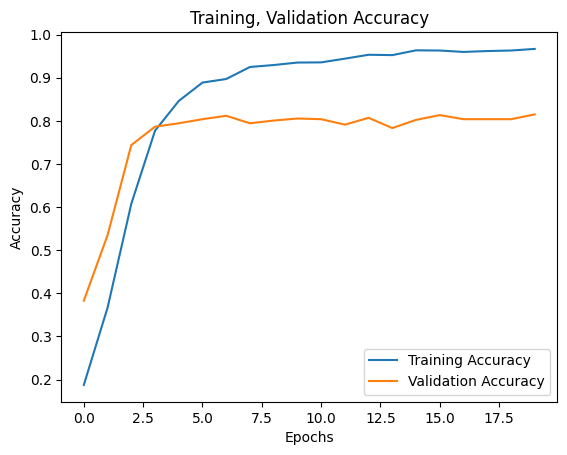

In [14]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Tạo một đối tượng figure và axes
fig, ax = plt.subplots()

# Vẽ đồ thị accuracy
ax.plot(accuracy, label='Training Accuracy')
# Vẽ đồ thị val_accuracy
ax.plot(val_accuracy, label='Validation Accuracy')


# Đặt tiêu đề cho đồ thị và các trục
ax.set_title('Training, Validation Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

# Hiển thị chú thích
ax.legend()

# Hiển thị đồ thị
plt.show()

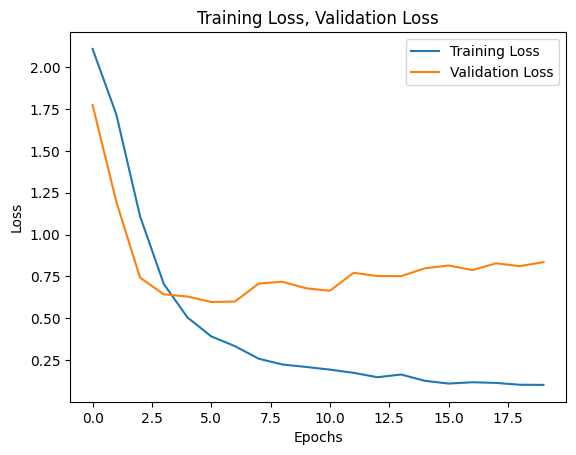

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

# Tạo một đối tượng figure và axes
fig, ax = plt.subplots()



ax.plot(loss, label='Training Loss')
ax.plot(val_loss, label='Validation Loss')

# Đặt tiêu đề cho đồ thị và các trục
ax.set_title('Training Loss, Validation Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

# Hiển thị chú thích
ax.legend()

# Hiển thị đồ thị
plt.show()

In [16]:
test_loss, test_accuracy = model.evaluate(test_sequences, test_labels_film)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

20/20 [==============================] - 0s 4ms/step - loss: 0.8630 - accuracy: 0.8088
Test loss: 0.8629999160766602
Test accuracy: 0.8088467717170715


In [17]:
def get_data_line(a):
      lines = a
      lines = gensim.utils.simple_preprocess(lines)
      lines = ' '.join(lines)
      lines = ViTokenizer.tokenize(lines)
      a = lines
      return a

In [18]:
input_sentence = get_data_line("Hôm nay tôi vui")

# Chuyển đổi câu thành dạng mà mô hình có thể nhận diện

input_sequence = tokenizer.texts_to_sequences([input_sentence])
input_sequence = tf.keras.preprocessing.sequence.pad_sequences(input_sequence, maxlen=max_sequence_length)

# Dự đoán kết quả
prediction = model.predict(input_sequence)

# Hiển thị kết quả
print(prediction)
print(np.argmax(prediction))

1/1 [==============================] - 1s 934ms/step
[[9.9554127e-03 6.1900337e-04 4.6240534e-03 9.1165665e-04 3.5744029e-04
  2.6320908e-03 4.5547941e-01 2.0625037e-03 5.2335840e-01]]
8


In [19]:
max_test = -1.0
index = 0
for i in range(1, 21):
  model_name = '/content/model1_' + str(i) + '.h5'
  loaded_model = tf.keras.models.load_model(model_name)
  loss, accuracy = loaded_model.evaluate(test_sequences, test_labels_film)
  print(accuracy)
  if accuracy > max_test:
    print(i)
    max_test = test_accuracy
    index = i
print(index)

20/20 [==============================] - 1s 6ms/step - loss: 1.7715 - accuracy: 0.3870
0.38704580068588257
1
20/20 [==============================] - 1s 7ms/step - loss: 1.2203 - accuracy: 0.5134
0.5134280920028687
20/20 [==============================] - 1s 6ms/step - loss: 0.7910 - accuracy: 0.7536
0.7535545229911804
20/20 [==============================] - 1s 4ms/step - loss: 0.6801 - accuracy: 0.7946
0.7946287393569946
20/20 [==============================] - 1s 4ms/step - loss: 0.6497 - accuracy: 0.8199
0.8199052214622498
5
20/20 [==============================] - 1s 5ms/step - loss: 0.6091 - accuracy: 0.8136
0.8135861158370972
6
20/20 [==============================] - 1s 4ms/step - loss: 0.6308 - accuracy: 0.8057
0.8056871891021729
20/20 [==============================] - 1s 5ms/step - loss: 0.7145 - accuracy: 0.7930
0.7930489778518677
20/20 [==============================] - 1s 5ms/step - loss: 0.7044 - accuracy: 0.8167
0.8167456388473511
9
20/20 [==============================

In [20]:
model_name = '/content/model1_' + str(index) + '.h5'
model_load = tf.keras.models.load_model(model_name)

input_sentence = get_data_line("Tôi buồn, cần niềm vui")

# Chuyển đổi câu thành dạng mà mô hình có thể nhận diện

input_sequence = tokenizer.texts_to_sequences([input_sentence])
input_sequence = tf.keras.preprocessing.sequence.pad_sequences(input_sequence, maxlen=max_sequence_length)

# Dự đoán kết quả
prediction = model_load.predict(input_sequence)

# Hiển thị kết quả
print(prediction)
print(np.argmax(prediction))

1/1 [==============================] - 1s 629ms/step
[[0.01854105 0.00131828 0.17793146 0.01060121 0.00645225 0.00193988
  0.18251432 0.03137341 0.5693281 ]]
8
